In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
x_vec = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\MATH 123\\HW4\\x.csv", delimiter=',')

In [3]:
u_basis = np.loadtxt("C:\\Users\\Joe\Desktop\\Tufts Fall 2022\\MATH 123\\HW4\\U.csv", delimiter=',')

In [4]:
print(x_vec.shape)
print(u_basis.shape)

(1000,)
(1000, 1000)


In [5]:
e_one = np.eye(1000)[:,0]

In [6]:
x_axis = np.arange(0,1000)

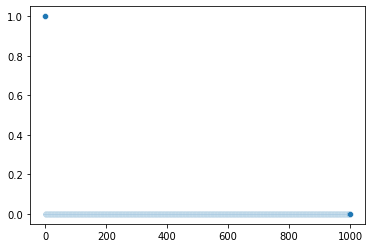

In [7]:
#Plotting e1 in the standard basis

sns.scatterplot(x=x_axis, y=e_one, ci=None,estimator=np.max)
plt.show;

In [17]:
#Encoding e1 in the basis U and plotting the representation

In [82]:
u_inv = np.transpose(u_basis)

In [83]:
e1_in_u = np.matmul(u_inv, e_one)

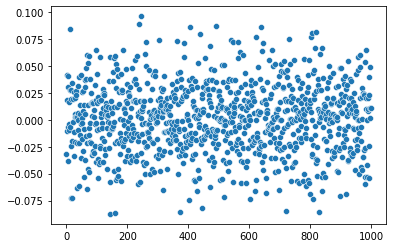

In [84]:
sns.scatterplot(x=x_axis, y=e1_in_u, ci=None,estimator=np.max)
plt.show;

In [85]:
# it is NOT sparse in the basis of U

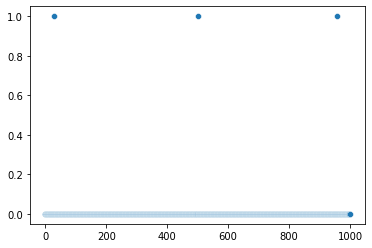

In [86]:
x_in_u = np.matmul(u_inv, x_vec)
sns.scatterplot(x=x_axis, y=x_in_u, ci=None,estimator=np.max)
plt.show;

In [ ]:
#X is not sparse in teh standard basis, but is sparse in the basis of U

In [12]:
c = np.copy(x_in_u)

In [13]:
Z = np.zeros(60*1000).reshape(60,1000)

In [14]:
for row in range(0,len(Z)):
    for col in range(0,len(Z[row])):
        Z[row,col] = np.random.randn()

In [76]:
A = (1/(60**.5))*Z

In [88]:
b = np.matmul(A,c)

In [94]:
y = np.zeros(1000)
t = 1/200
alpha = .3

In [96]:
for i in range(0,10):
     y = np.copy(y - np.matmul(np.transpose(A) , (np.matmul(A,y) - b)))
     y_sort = np.sort(abs(y))[::-1]
     orig_y_indics = list()
     for i in range(0,3):
          orig_y_indics.append(np.where(y==y_sort[i])[0])
     z = np.zeros(1000)
     for i in range(0,3):
          z[orig_y_indics[i]] = y_sort[i]
     y=np.copy(z)

In [97]:
c_hat = np.copy(y)

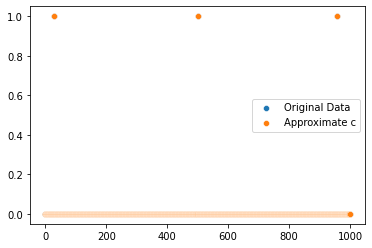

In [98]:
sns.scatterplot(x=x_axis, y=c)
sns.scatterplot(x=x_axis ,y=c_hat)
plt.legend(labels=['Original Data','Approximate c'])
plt.show;

In [99]:
x_hat = np.matmul(u_basis,c_hat)

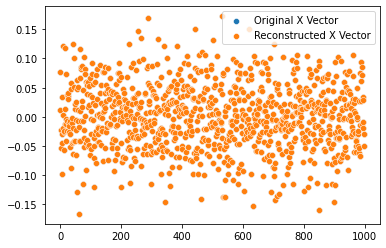

In [100]:
sns.scatterplot(x=x_axis, y=x_vec, ci=None)
sns.scatterplot(x=x_axis, y=x_hat,ci=None)
plt.legend(labels=['Original X Vector','Reconstructed X Vector'])
plt.show;

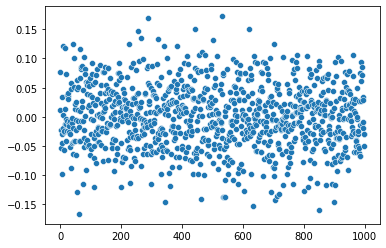

In [101]:
sns.scatterplot(x=x_axis, y=x_hat,ci=None)
plt.show;

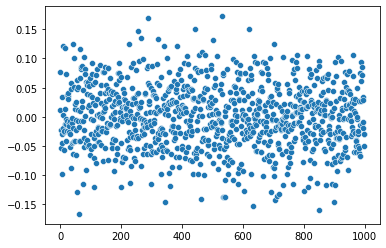

In [102]:
sns.scatterplot(x=x_axis, y=x_vec, ci=None)
plt.show;

In [62]:
##### end of question 2 #######

In [63]:
#### Question 4 ##########

In [29]:
mnist = np.loadtxt("C:\\Users\\Joe\\Desktop\\Tufts Fall 2022\\MATH 123\\HW4\\data_067.csv", delimiter=',')

In [30]:
mnist.shape

(21072, 784)

In [31]:
from sklearn.decomposition import PCA

In [32]:
pca_mod = PCA(n_components=2)

In [33]:
pca_mod.fit_transform(mnist)

array([[ 4.0827239 , -1.00021916],
       [-0.13932523,  3.85724352],
       [-2.48543333, -2.54435058],
       ...,
       [-3.9849882 , -2.32992145],
       [ 5.90618283, -0.19137284],
       [ 3.24211899,  4.2917678 ]])

In [34]:
pca_mod.components_.shape

(2, 784)

In [35]:
projections = np.matmul(mnist,np.transpose(pca_mod.components_))

In [36]:
projections.shape

(21072, 2)

In [37]:
labels = np.loadtxt("C:\\Users\\Joe\\Desktop\\Tufts Fall 2022\\MATH 123\\HW4\\label_067.csv", delimiter=',')

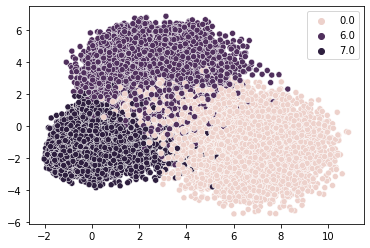

In [38]:
sns.scatterplot(x=projections[:,0], y=projections[:,1], hue=labels)
plt.show;

In [77]:
#The above is the actual tagging of the data
#Now we want to do k-means clustering
#generating good starting points

In [39]:
sample_means = np.mean(projections, axis=0)
sample_means

array([2.66173482, 0.50625803])

In [40]:
cov_mat = ((1/21072)*np.matmul(np.transpose(projections),projections))

In [41]:
var1 = cov_mat[0,0]
var2 = cov_mat[1,1]

In [42]:
print(sample_means)
print([var1, var2])

[2.66173482 0.50625803]
[15.932003754408573, 6.69372314103406]


In [43]:
k_list = list()
for i in range(0,3):
    k_comp1 = np.random.normal(loc=sample_means[0],scale=(var1**.5))
    k_comp2 = np.random.normal(loc=sample_means[1],scale=(var2**.5))
    k_list.append([k_comp1,k_comp2])



In [44]:
k_arr = np.array(k_list)
k_arr.shape

(3, 2)

In [45]:
#just read instructinos that we can use sklearn, so will do both starting ways
from sklearn.cluster import KMeans

In [46]:
kmeans = KMeans(n_clusters=3, init='k-means++' , n_init=100,random_state=1)

In [47]:
kmeans.fit(projections)

KMeans(n_clusters=3, n_init=100, random_state=1)

In [48]:
kmeans.labels_

array([0, 1, 2, ..., 2, 0, 1])

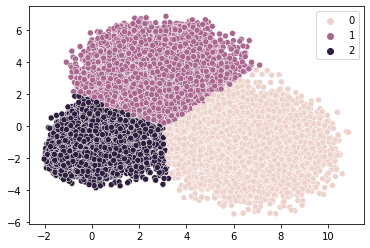

In [49]:
sns.scatterplot(x=projections[:,0],y=projections[:,1], hue=kmeans.labels_)
plt.show;

In [50]:
kmeans2 = KMeans(n_clusters=3, init=k_arr , n_init=100,random_state=1).fit(projections)

C:\Users\Joe\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1305: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=100.
  super()._check_params(X)


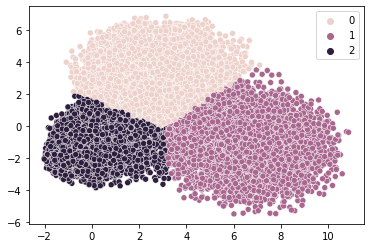

In [52]:
sns.scatterplot(x=projections[:,0],y=projections[:,1], hue=kmeans2.labels_)
plt.show;